For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

Start by creating a new Notebook for this assignment.
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

![dataframe example](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/7JXaz3NNEeiMwApe4i-fLg_40e690ae0e927abda2d4bde7d94ed133_Screen-Shot-2018-06-18-at-7.17.57-PM.png?expiry=1589068800000&hmac=qzYkoLq5XsqE06VeplzJ13UfdrokXnyfhItpfpO3vps)

3. To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
4. Submit a link to your Notebook on your Github repository. (10 marks)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

## Begin of part 1

In [1]:
#%pip install beautifulsoup4
#%pip install  numpy scipy matplotlib pandas sympy nose
#%pip install requests

from bs4 import BeautifulSoup
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import requests

In [3]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_response = requests.get(wiki_url)
soup = BeautifulSoup(wiki_response.text)
html_table = soup.table
table = []
header_row = []
table_rows = html_table.find_all('tr')

#get dataframe column names
th = table_rows[0].find_all('th')
for ath in th:
    header_row.append(ath.text.rstrip())
    
    
#get dataframe data
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    if row != []:
        #print(row)
        table.append(row)
    
    
pd_toronto = pd.DataFrame(table).replace('\n','', regex=True) 
print(pd_toronto.shape)
pd_toronto.columns = header_row
pd_toronto.columns = pd_toronto.columns.str.replace(' ', '')
pd_toronto.head()

(180, 3)


,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
#if Borough = "Not assigned", then remove it 
pd_toronto = pd_toronto[pd_toronto.Borough != "Not assigned"]
pd_toronto.reset_index(inplace = True, drop = True)

pd_toronto.head()


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

using describe to check if the above siutation - a posal code is listed twice

In [5]:
print(pd_toronto.describe())

       PostalCode     Borough Neighborhood
count         103         103          103
unique        103          10           98
top           M6N  North York    Downsview
freq            1          24            4


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
use pd_toronto[pd_toronto.Neighborhood == "Not assigned"] to check if there is any Not assigned neighborhood

In [6]:
print(pd_toronto[pd_toronto.Neighborhood == "Not assigned"])
neighborhood_list = []
for aline in pd_toronto.Neighborhood:
    aline_list = aline.split(", ")
    for a_neighborhood in aline_list:
        neighborhood_list.append(a_neighborhood)
neighborhood_set = set(neighborhood_list)
nb_neighborhood = len(neighborhood_set)
print("there are " + str(nb_neighborhood) + " neighborhood in Toronto city")
print("Toronto dataframe shape is" + str(pd_toronto.shape))

Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []
there are 201 neighborhood in Toronto city
Toronto dataframe shape is(103, 3)


there are 
       Postal Code     Borough Neighborhood
count          103         103          103
unique         103          10           98
top            M5P  North York    Downsview
freq             1          24            4

In the dataframe, there are
column postal code have 103 line, they are all unique values
column Borough has 10 unique values
Colume Neighborhood, a line at least 1 Neighborhood

there are 201 neighborhoods in Toronto city

## End of part 1

## Begin of part 2

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

![dataframe eg](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/HZ3jNHNOEeiMwApe4i-fLg_f44f0f10ccfaf42fcbdba9813364e173_Screen-Shot-2018-06-18-at-7.18.16-PM.png?expiry=1589068800000&hmac=C-U9wl2DccUUgHdK3SR9UAtx8f7_unjfmiTKl4333jM)




Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)



In [7]:
#!wget -q -O 'Geospatial_Coordinates.csv' http://cocl.us/Geospatial_data
#print('Data downloaded!')

In [8]:
url = "http://cocl.us/Geospatial_data"
df_geo = pd.read_csv(url)


In [9]:
df_geo.columns = df_geo.columns.str.replace(' ', '')

print(df_geo.head())
print(df_geo.describe())
print ("there are " + str(len(df_geo.PostalCode.unique())) + " unique postal code")




  PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476
         Latitude   Longitude
count  103.000000  103.000000
mean    43.704608  -79.397153
std      0.052463    0.097146
min     43.602414  -79.615819
25%     43.660567  -79.464763
50%     43.696948  -79.388790
75%     43.745320  -79.340923
max     43.836125  -79.160497
there are 103 unique postal code


In [12]:
pd_toronto_geo = pd.merge(pd_toronto, df_geo, how='left', on=['PostalCode'])

print(pd_toronto_geo.head())
print("shape of pd_toronto_geo dataframe is " + str(pd_toronto_geo.shape))
pd_toronto_geo.to_csv('pd_toronto_geo.csv', sep=';', index=False)

  PostalCode           Borough                                 Neighborhood  \
0        M3A        North York                                    Parkwoods   
1        M4A        North York                             Victoria Village   
2        M5A  Downtown Toronto                    Regent Park, Harbourfront   
3        M6A        North York             Lawrence Manor, Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494  
shape of pd_toronto_geo dataframe is (103, 5)


## End of part 2

## Begin of part 3
Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make.
to generate maps to visualize your neighborhoods and how they cluster together.
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

In [2]:
#%pip install scikit-learn
from sklearn.cluster import KMeans

In [49]:
CLIENT_ID = 'your_client_id' # your Foursquare ID
CLIENT_SECRET = 'your_client_secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your_client_id
CLIENT_SECRET:your_client_secret


In [4]:
pd_toronto_geo2 = pd_toronto_geo[pd_toronto_geo['Borough'].str.contains("Toronto")]
pd_toronto_geo2.reset_index(inplace = True, drop = True)
pd_toronto_geo2.to_csv('pd_toronto_geo2.csv', sep=';', index=False)
print(pd_toronto_geo2.shape)
pd_toronto_geo2.head()

In [10]:
pd_toronto_geo2 = pd.read_csv('.\pd_toronto_geo2.csv', sep=';')
pd_toronto_geo2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


A function to get the top 100 recommended venues (ref function defined in the cours)

In [12]:
def getNearbyVenues(postalcodes, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for postalcode, lat, lng in zip(postalcodes, latitudes, longitudes):
        print(postalcode)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postalcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
toronto_venues = getNearbyVenues(postalcodes=pd_toronto_geo2['PostalCode'],
                                   latitudes=pd_toronto_geo2['Latitude'],
                                   longitudes=pd_toronto_geo2['Longitude'])

M5A
M7A
M5B
M5C
M4E
M5E
M5G
M6G
M5H
M6H
M5J
M6J
M4K
M5K
M6K
M4L
M5L
M4M
M4N
M5N
M4P
M5P
M6P
M4R
M5R
M6R
M4S
M5S
M6S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M4Y
M7Y


In [14]:
print(toronto_venues.shape)
toronto_venues.head()

(1624, 7)


,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Analyze Each Neighborhood 

save result to csv file, in case of needed, read csv file insteamd of use foursquare api (limit of free accouont)

In [15]:
toronto_venues.to_csv('toronto_venues.csv', sep=';', index=False)

Analyze Each Neighborhood

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['PostalCode'] = toronto_venues['PostalCode'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,PostalCode,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped

,PostalCode,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M4E,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.25000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4K,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.023810,0.000000,...,0.000000,0.000000,0.02381,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810
2,M4L,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4M,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.050000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.025000,0.000000,0.025000
4,M4N,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,M4P,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,M4R,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478
7,M4S,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.026316,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,M4T,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,M4V,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.062500,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000


show top 10 venues of each postal code

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Health Food Store,Pub,Neighborhood,Trail,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Yoga Studio
1,M4K,Greek Restaurant,Italian Restaurant,Coffee Shop,Furniture / Home Store,Bookstore,Ice Cream Shop,Yoga Studio,Pub,Pizza Place,Lounge
2,M4L,Fast Food Restaurant,Sandwich Place,Burrito Place,Fish & Chips Shop,Steakhouse,Pub,Sushi Restaurant,Intersection,Food & Drink Shop,Italian Restaurant
3,M4M,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Sandwich Place,Cheese Shop
4,M4N,Park,Swim School,Bus Line,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
5,M4P,Sandwich Place,Breakfast Spot,Hotel,Food & Drink Shop,Department Store,Gym,Park,Donut Shop,Eastern European Restaurant,Doner Restaurant
6,M4R,Clothing Store,Coffee Shop,Yoga Studio,Miscellaneous Shop,Seafood Restaurant,Salon / Barbershop,Restaurant,Rental Car Location,Pet Store,Park
7,M4S,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Café,Gym,Italian Restaurant,Coffee Shop,Seafood Restaurant,Diner
8,M4T,Playground,Yoga Studio,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
9,M4V,Coffee Shop,Pub,Sushi Restaurant,Supermarket,Vietnamese Restaurant,Light Rail Station,Sports Bar,Liquor Store,Restaurant,American Restaurant


Use elbow to check the K value and MSE

In [32]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

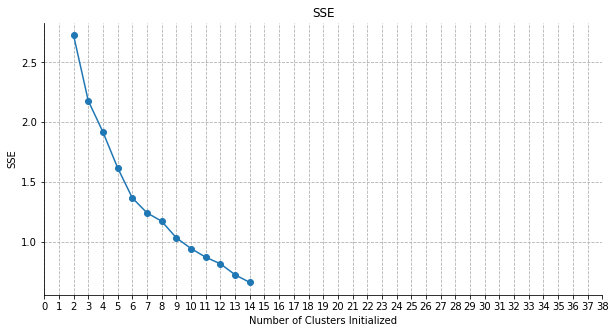

In [38]:
%matplotlib inline

toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)


MSE = []  
for k in range(2,15):
    km = KMeans(n_clusters=k, random_state=0)  
    km.fit(toronto_grouped_clustering)
    MSE.append(km.inertia_)
# inertia_:Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,5))   
plt.plot(range(2,15),MSE,'o-')
plt.xticks(range(0,39,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel('SSE')
plt.title("SSE")
sns.despine()

the elbow method cannot have a clear indication about value of K, it looks like 5 and 6 can all good candicate valued for k

In [43]:
km = KMeans(n_clusters=5, random_state=0) 
km.fit(toronto_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [44]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', km.labels_)

In [45]:
neighborhoods_venues_sorted.head()

,Cluster Labels,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,M4E,Health Food Store,Pub,Neighborhood,Trail,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Yoga Studio
1,4,M4K,Greek Restaurant,Italian Restaurant,Coffee Shop,Furniture / Home Store,Bookstore,Ice Cream Shop,Yoga Studio,Pub,Pizza Place,Lounge
2,4,M4L,Fast Food Restaurant,Sandwich Place,Burrito Place,Fish & Chips Shop,Steakhouse,Pub,Sushi Restaurant,Intersection,Food & Drink Shop,Italian Restaurant
3,4,M4M,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Sandwich Place,Cheese Shop
4,2,M4N,Park,Swim School,Bus Line,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [47]:
toronto_merged = pd_toronto_geo2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('PostalCode'), on='PostalCode')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Park,Pub,Bakery,Theater,Restaurant,Breakfast Spot,Café,Hotel,Chocolate Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Bank,Beer Bar,Sandwich Place,Restaurant,Burger Joint,Burrito Place,Café,Park
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Clothing Store,Coffee Shop,Café,Restaurant,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Diner
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Coffee Shop,Café,American Restaurant,Gastropub,Cocktail Bar,Department Store,Creperie,Lingerie Store,Moroccan Restaurant,Italian Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Health Food Store,Pub,Neighborhood,Trail,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Yoga Studio


In [48]:
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Park,Pub,Bakery,Theater,Restaurant,Breakfast Spot,Café,Hotel,Chocolate Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Bank,Beer Bar,Sandwich Place,Restaurant,Burger Joint,Burrito Place,Café,Park
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Clothing Store,Coffee Shop,Café,Restaurant,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Diner
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Coffee Shop,Café,American Restaurant,Gastropub,Cocktail Bar,Department Store,Creperie,Lingerie Store,Moroccan Restaurant,Italian Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Health Food Store,Pub,Neighborhood,Trail,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Yoga Studio
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Coffee Shop,Cocktail Bar,Café,Beer Bar,Cheese Shop,Restaurant,Bakery,Seafood Restaurant,Bistro,Jazz Club
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bar,Ice Cream Shop,Japanese Restaurant,Salad Place,Thai Restaurant,Bubble Tea Shop
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564,4,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Restaurant,Baby Store,Candy Store,Nightclub
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,4,Coffee Shop,Café,Restaurant,Gym,Hotel,Thai Restaurant,Deli / Bodega,Clothing Store,Sushi Restaurant,Bookstore
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,4,Pharmacy,Bakery,Grocery Store,Supermarket,Gas Station,Gym / Fitness Center,Liquor Store,Middle Eastern Restaurant,Music Venue,Pool


34 postale codes   in category 4: lot of coffee shop, sushi restaurant
1 postale code in category 0:

2 postale codes are in category 1: 
1. Rosedale, according to wiki,  one of the wealthiest and most highly priced neighbourhoods in Canada, known as the area where the city's 'old money' lives
2. Forest Hill, Toronto, according to wiki, is considered as one of Toronto's wealthiest and most affluent neighbourhoods


1 postale code in category 2:
Lawrence Park, it was ranked the wealthiest neighbourhood in all of Canada in 2011.



Draw a map to display the cluster

In [58]:
#%pip install folium
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [61]:
# create map
kclusters = 5
latitude = 43.651070
longitude = -79.347015
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
unique, counts = np.unique(km.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 1, 1: 2, 2: 1, 3: 1, 4: 34}

label 0: Roselawn, there is no detail information from internet  
Label 1: Rosedale and forest hill , according to wiki,  are rich neigborhoods  
Label 2: Lawrence Park, according to wiki, was ranked the wealthiest neighbourhood in all of Canada in 2011  
Label 3: Moore Park is one of Toronto's most affluent neighbourhoods.  
Label 4: 34 postal codes are included under this label, they looks like in the center of torono, and coffee shop prensent often in the top 3 venues